# Aprendizaje Supervisado con H2O

### Docente: M.Sc. Richard Fernández

In [9]:
#!java -version
#https://jdk.java.net/archive/
#https://www.oracle.com/java/technologies/downloads/#jdk20-windows
#!apt-get install default-jre

In [2]:
! pip install h2o

     -------------------------------------- 177.6/177.6 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697897 sha256=3cb584f207ec5e8ab3aa02c8254e8c14659b33910005c583662ae9530bb13d9c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\5d\cb\0e\dd8dc3921ae87b3657d7f1b83607100fd896107eef31d404c6
Successfully built h2o


In [6]:
#conda install -c anaconda h2o
import h2o

In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\HP\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HP\AppData\Local\Temp\tmpwj_6thhr
  JVM stdout: C:\Users\HP\AppData\Local\Temp\tmpwj_6thhr\h2o_HP_started_from_python.out
  JVM stderr: C:\Users\HP\AppData\Local\Temp\tmpwj_6thhr\h2o_HP_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_HP_9jpie5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.922 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
# Creación de un cluster local H2O
# ------------------------------------------------------------------------------
#h2o.init(ip = "localhost",
#         # -1 indica que se empleen todos los cores disponibles.
#         nthreads = -1,
#         # Máxima memoria disponible para el cluster.
#         max_mem_size = "4g")

In [4]:
# Carga de datos en el cluster H2O
data_h2o = h2o.import_file(
                path   = "D:/Bases/Kaggle/Banco/bank_deposit.csv",
                header = 1,
                sep    = ",",
                destination_frame = "datos_h2o"
            )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [2]:
# Duration: duración del último contacto (segundos)
# Previous: número de contactos realizados antes de esta campaña
# Housing: préstamo de vivienda
# Campaign: número de contactos realizados durante esta campaña
# Loan: préstamo personal
# Default: en default
# Target: aceptó depósito a plazo

In [10]:
data_h2o['housing'] = data_h2o['housing'].asfactor()
data_h2o['loan'] = data_h2o['loan'].asfactor()
data_h2o['default'] = data_h2o['default'].asfactor()
data_h2o['target'] = data_h2o['target'].asfactor()

In [28]:
data_h2o.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
1,261,0,1,1,0,0,0,1
2,50,0,1,1,0,0,0,1
3,1492,0,1,1,0,0,0,1
4,104,0,1,1,0,0,0,1
5,13,0,1,1,0,0,0,1


In [30]:
train, test = data_h2o.split_frame(ratios = [0.8], seed = 1234)

In [31]:
train.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
1,261,0,1,1,0,0,0,1
2,50,0,1,1,0,0,0,1
3,1492,0,1,1,0,0,0,1
5,13,0,1,1,0,0,0,1
6,172,0,1,1,1,0,0,1


In [32]:
test.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
4,104,0,1,1,0,0,0,1
10,203,0,1,1,0,0,0,1
15,175,0,0,1,1,0,0,0
18,98,0,1,1,0,0,0,1
19,186,0,1,2,0,0,0,0


In [41]:
X_h2o = ['housing','loan','duration','previous','campaign']
y_h2o = 'target'

In [39]:
#1.Modelo glm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [46]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          link   = "logit",
                                          nfolds = 5,
                                          lambda_ = 0,
                                          compute_p_values = True)
glm_model.train(X_h2o, y_h2o, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1636298556791_3


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,5,5,5,py_12_sid_a816




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1519190505439806
RMSE: 0.38976794447976426
LogLoss: 0.4782353825006338
Null degrees of freedom: 8504
Residual degrees of freedom: 8499
Null deviance: 11790.360055034163
Residual deviance: 8134.78385633578
AIC: 8146.78385633578
AUC: 0.8624941936340109
AUCPR: 0.8438967132081653
Gini: 0.7249883872680218

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39514457027066363: 


,,0,1,Error,Rate
0,0,3021.0,1219.0,0.2875,(1219.0/4240.0)
1,1,563.0,3702.0,0.132,(563.0/4265.0)
2,Total,3584.0,4921.0,0.2095,(1782.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.395145,0.806009,240.0
1,max f2,0.184703,0.869282,327.0
2,max f0point5,0.509717,0.797974,197.0
3,max accuracy,0.432351,0.795297,225.0
4,max precision,0.999618,0.951807,0.0
5,max recall,0.023170,1.000000,393.0
6,max specificity,0.999618,0.999057,0.0
7,max absolute_mcc,0.432351,0.592273,225.0
8,max min_per_class_accuracy,0.475820,0.790330,209.0
9,max mean_per_class_accuracy,0.432351,0.795181,225.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score:  7.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010112,0.252178,0.765193,0.765193,0.383721,0.345681,0.383721,0.345681,0.007737,0.007737,-23.480738,-23.480738,-0.004763
1,2,0.020106,0.204660,1.243404,1.002900,0.623529,0.221784,0.502924,0.284095,0.012427,0.020164,24.340390,0.289998,0.000117
2,3,0.030100,0.181831,1.407627,1.137282,0.705882,0.192186,0.570312,0.253578,0.014068,0.034232,40.762706,13.728202,0.008289
3,4,0.040094,0.167053,1.478008,1.222214,0.741176,0.173355,0.612903,0.233581,0.014771,0.049004,47.800841,22.221382,0.017871
4,5,0.050088,0.153490,1.595311,1.296658,0.800000,0.160068,0.650235,0.218913,0.015944,0.064947,59.531067,29.665803,0.029806
5,6,0.100059,0.119645,1.520237,1.408316,0.762353,0.133936,0.706228,0.176475,0.075967,0.140914,52.023723,40.831626,0.081952
6,7,0.150029,0.102860,1.290325,1.369017,0.647059,0.109944,0.686520,0.154315,0.064478,0.205393,29.032481,36.901660,0.111053
7,8,0.200000,0.095720,0.807040,1.228605,0.404706,0.098768,0.616108,0.140437,0.040328,0.245721,-19.296049,22.860492,0.091712
8,9,0.300059,0.084253,0.864673,1.107247,0.433608,0.091122,0.555251,0.123992,0.086518,0.332239,-13.532662,10.724687,0.064550
9,10,0.400000,0.066980,1.269210,1.147714,0.636471,0.074534,0.575544,0.111635,0.126846,0.459086,26.921040,14.771395,0.118520




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.15209896060548087
RMSE: 0.38999866744064765
LogLoss: 0.47916397286661855
Null degrees of freedom: 8504
Residual degrees of freedom: 8499
Null deviance: 11792.948907750168
Residual deviance: 8150.579178461181
AIC: 8162.579178461181
AUC: 0.8621857650025437
AUCPR: 0.8435617834188456
Gini: 0.7243715300050875

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40514872798667495: 


,,0,1,Error,Rate
0,0,3078.0,1162.0,0.2741,(1162.0/4240.0)
1,1,607.0,3658.0,0.1423,(607.0/4265.0)
2,Total,3685.0,4820.0,0.208,(1769.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.405149,0.805283,232.0
1,max f2,0.197000,0.869098,316.0
2,max f0point5,0.546113,0.798195,175.0
3,max accuracy,0.450420,0.794944,212.0
4,max precision,0.997941,0.954839,1.0
5,max recall,0.024665,1.000000,393.0
6,max specificity,0.999478,0.998821,0.0
7,max absolute_mcc,0.440429,0.590901,216.0
8,max min_per_class_accuracy,0.476600,0.791038,202.0
9,max mean_per_class_accuracy,0.450420,0.794877,212.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score: 41.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010112,0.876617,0.649254,0.649254,0.325581,1.051885,0.325581,1.051885,0.006565,0.006565,-35.074566,-35.074566,-0.007114
1,2,0.020106,0.791825,1.665692,1.154501,0.835294,0.829041,0.578947,0.941115,0.016647,0.023212,66.569202,15.450114,0.006231
2,3,0.030100,0.744222,1.595311,1.300864,0.800000,0.767548,0.652344,0.883485,0.015944,0.039156,59.531067,30.086368,0.018165
3,4,0.040094,0.712368,1.337246,1.309933,0.670588,0.727482,0.656891,0.844598,0.013365,0.052521,33.724571,30.993251,0.024926
4,5,0.050088,0.684814,1.173023,1.282615,0.588235,0.698000,0.643192,0.815348,0.011723,0.064244,17.302255,28.261480,0.028395
5,6,0.100059,0.596145,1.417011,1.349734,0.710588,0.636859,0.676851,0.726208,0.070809,0.135053,41.701124,34.973406,0.070194
6,7,0.150029,0.541210,1.463932,1.387770,0.734118,0.568223,0.695925,0.673588,0.073154,0.208206,46.393214,38.777025,0.116697
7,8,0.200000,0.500741,1.295017,1.364596,0.649412,0.519582,0.684303,0.635109,0.064713,0.272919,29.501690,36.459555,0.146268
8,9,0.300059,0.450108,1.164614,1.297909,0.584019,0.473717,0.650862,0.581290,0.116530,0.389449,16.461428,29.790900,0.179307
9,10,0.400000,0.415049,0.954840,1.212192,0.478824,0.431766,0.607878,0.543931,0.095428,0.484877,-4.515964,21.219226,0.170254




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.793574,0.010273,0.787861,0.795783,0.778818,0.802976,0.802433
1,auc,0.862153,0.014510,0.851145,0.864865,0.843461,0.875778,0.875515
2,err,0.206426,0.010273,0.212139,0.204217,0.221182,0.197024,0.197567
3,err_count,351.200000,20.179197,367.000000,339.000000,378.000000,331.000000,341.000000
4,f0point5,0.775652,0.012388,0.770254,0.783015,0.756689,0.787788,0.780514
5,f1,0.808681,0.012044,0.804058,0.809658,0.792990,0.826247,0.810450
6,f2,0.844704,0.013893,0.840965,0.838177,0.832950,0.868653,0.842775
7,lift_top_group,0.771861,0.263789,0.775090,1.046218,0.452116,1.016471,0.569411
8,logloss,0.479065,0.023862,0.500061,0.474016,0.507559,0.459262,0.454426
9,max_per_class_error,0.284383,0.020131,0.292343,0.268293,0.301496,0.301863,0.257919



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-11-07 11:35:35,0.000 sec,0,5895.180028,0.693143,,,,,,,
1,,2021-11-07 11:35:35,0.006 sec,1,4347.860893,0.511212,,,,,,,
2,,2021-11-07 11:35:35,0.008 sec,2,4093.924787,0.481355,,,,,,,
3,,2021-11-07 11:35:35,0.011 sec,3,4067.800018,0.478283,,,,,,,
4,,2021-11-07 11:35:35,0.014 sec,4,4067.392051,0.478235,,,,,,,
5,,2021-11-07 11:35:35,0.016 sec,5,4067.391928,0.478235,0.389768,0.478235,0.392319,0.862494,0.843897,0.765193,0.209524



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,1.877789,1.000000,0.371646
1,housing.1,1.345453,0.716509,0.266288
2,loan.1,0.862158,0.459135,0.170636
3,previous,0.549274,0.292511,0.108711
4,campaign,0.417949,0.222575,0.082719


In [49]:
coeficientes = glm_model._model_json['output']['coefficients_table'].as_data_frame()
coeficientes

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.915567,0.060012,-15.256476,0.0,0.949654
1,housing.1,-1.345453,0.057189,-23.526587,0.0,-1.345453
2,loan.1,-0.862158,0.087990,-9.798321,0.0,-0.862158
3,duration,0.005442,0.000140,38.967852,0.0,1.877789
4,previous,0.242527,0.016202,14.968981,0.0,0.549274
5,campaign,-0.156585,0.014530,-10.776698,0.0,-0.417949


In [50]:
coeficientes = glm_model._model_json['output']['coefficients_table'].as_data_frame()
coeficientes[coeficientes["coefficients"] != 0]

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.915567,0.060012,-15.256476,0.0,0.949654
1,housing.1,-1.345453,0.057189,-23.526587,0.0,-1.345453
2,loan.1,-0.862158,0.087990,-9.798321,0.0,-0.862158
3,duration,0.005442,0.000140,38.967852,0.0,1.877789
4,previous,0.242527,0.016202,14.968981,0.0,0.549274
5,campaign,-0.156585,0.014530,-10.776698,0.0,-0.417949


In [52]:
importancia_predictores = glm_model.varimp(use_pandas=True)
importancia_predictores.head()

,variable,relative_importance,scaled_importance,percentage
0,duration,1.877789,1.000000,0.371646
1,housing.1,1.345453,0.716509,0.266288
2,loan.1,0.862158,0.459135,0.170636
3,previous,0.549274,0.292511,0.108711
4,campaign,0.417949,0.222575,0.082719


Text(0.5, 0.98, 'Importancia de los predictores')

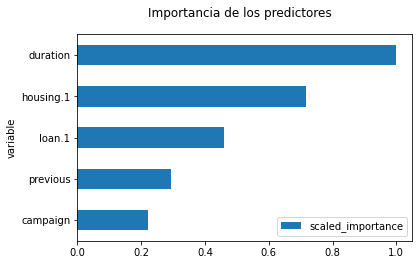

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
importancia_predictores.head(10).plot.barh(x='variable', y='scaled_importance', ax=ax)
ax.invert_yaxis()
fig.suptitle('Importancia de los predictores', fontsize='large')

In [56]:
# Matriz de confusión
glm_model.confusion_matrix(train = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39514457027066363: 


,,0,1,Error,Rate
0,0,3021.0,1219.0,0.2875,(1219.0/4240.0)
1,1,563.0,3702.0,0.132,(563.0/4265.0)
2,Total,3584.0,4921.0,0.2095,(1782.0/8505.0)


In [60]:
#Métricas de train
print("auc: ", glm_model.auc(train=True))
print("Gini: ",glm_model.gini(train=True))

auc:  0.8624941936340109
Gini:  0.7249883872680218


In [47]:
glm_predict = glm_model.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [48]:
glm_predict.head()

predict,p0,p1,StdErr
0,0.864321,0.135679,0.059489
0,0.788,0.212,0.0528265
0,0.727503,0.272497,0.0912273
0,0.868105,0.131895,0.0599715
0,0.826641,0.173359,0.0518099
0,0.867339,0.132661,0.0560656
0,0.752421,0.247579,0.0510793
0,0.818886,0.181114,0.054941
0,0.70292,0.29708,0.0495768
0,0.616536,0.383464,0.0488511


In [57]:
glm_performance = glm_model.model_performance(test_data = test)

In [59]:
#Métricas de test
print(f"auc: {glm_performance.auc()}")
print(f"Gini: {glm_performance.gini()}")

auc: 0.8540895532948046
Gini: 0.7081791065896093


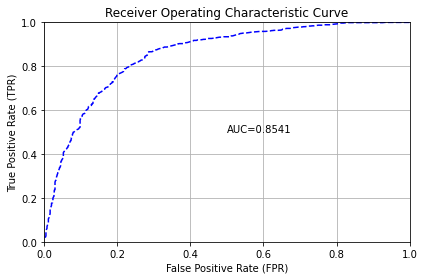

In [61]:
#Curva ROC
glm_performance.plot(type='roc')

In [62]:
#2. Modelo boosting
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [66]:
boos_model = H2OGradientBoostingEstimator(distribution = "bernoulli",
                                          ntrees = 500,
                                          max_depth = 3,
                                          min_rows = 10,
                                          nfolds = 5)
boos_model.train(X_h2o, y_h2o, training_frame = train, validation_frame = test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1636298556791_852


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,214.0,214.0,32480.0,0.0,3.0,2.96729,1.0,8.0,7.373832




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13203624010073364
RMSE: 0.3633679128661936
LogLoss: 0.41095333957177216
Mean Per-Class Error: 0.18600112809396352
AUC: 0.8931841005109602
AUCPR: 0.8895109824054456
Gini: 0.7863682010219204

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4659975187414368: 


,,0,1,Error,Rate
0,0,3234.0,1006.0,0.2373,(1006.0/4240.0)
1,1,590.0,3675.0,0.1383,(590.0/4265.0)
2,Total,3824.0,4681.0,0.1877,(1596.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.465998,0.821596,218.0
1,max f2,0.168427,0.884401,313.0
2,max f0point5,0.659402,0.820018,156.0
3,max accuracy,0.491179,0.814109,212.0
4,max precision,0.991934,1.000000,0.0
5,max recall,0.014863,1.000000,391.0
6,max specificity,0.991934,1.000000,0.0
7,max absolute_mcc,0.491179,0.629866,212.0
8,max min_per_class_accuracy,0.563183,0.810317,191.0
9,max mean_per_class_accuracy,0.491179,0.813999,212.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score: 50.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010582,0.976470,1.994138,1.994138,1.000000,0.981975,1.000000,0.981975,0.021102,0.021102,99.413834,99.413834,0.021102
1,2,0.020106,0.965469,1.994138,1.994138,1.000000,0.971013,1.000000,0.976782,0.018992,0.040094,99.413834,99.413834,0.040094
2,3,0.030100,0.958437,1.970678,1.986349,0.988235,0.961466,0.996094,0.971697,0.019695,0.059789,97.067788,98.634873,0.059553
3,4,0.040094,0.952663,1.994138,1.988290,1.000000,0.955321,0.997067,0.967615,0.019930,0.079719,99.413834,98.829042,0.079483
4,5,0.050088,0.945859,1.876836,1.966052,0.941176,0.949020,0.985915,0.963905,0.018757,0.098476,87.683608,96.605188,0.097061
5,6,0.100059,0.926700,1.909681,1.937899,0.957647,0.935183,0.971798,0.949561,0.095428,0.193904,90.968071,93.789942,0.188243
6,7,0.150029,0.904548,1.820531,1.898807,0.912941,0.917655,0.952194,0.938934,0.090973,0.284877,82.053100,89.880727,0.270490
7,8,0.200000,0.872403,1.848684,1.886284,0.927059,0.890866,0.945914,0.926924,0.092380,0.377257,84.868354,88.628370,0.355559
8,9,0.300294,0.776263,1.645807,1.805968,0.825322,0.823967,0.905638,0.892538,0.165064,0.542321,64.580702,80.596788,0.485482
9,10,0.400235,0.681914,1.431088,1.712358,0.717647,0.727911,0.858696,0.851430,0.143025,0.685346,43.108751,71.235792,0.571902




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.15059459999145475
RMSE: 0.38806520069629374
LogLoss: 0.4653128060922921
Mean Per-Class Error: 0.20866738783960914
AUC: 0.861028360343184
AUCPR: 0.8316494865066612
Gini: 0.722056720686368

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46591790610149997: 


,,0,1,Error,Rate
0,0,770.0,279.0,0.266,(279.0/1049.0)
1,1,155.0,869.0,0.1514,(155.0/1024.0)
2,Total,925.0,1148.0,0.2094,(434.0/2073.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.465918,0.800184,222.0
1,max f2,0.135872,0.875088,329.0
2,max f0point5,0.687198,0.790038,142.0
3,max accuracy,0.465918,0.790642,222.0
4,max precision,0.985519,1.000000,0.0
5,max recall,0.025134,1.000000,384.0
6,max specificity,0.985519,1.000000,0.0
7,max absolute_mcc,0.465918,0.586023,222.0
8,max min_per_class_accuracy,0.553793,0.781697,194.0
9,max mean_per_class_accuracy,0.465918,0.791333,222.0



Gains/Lift Table: Avg response rate: 49.40 %, avg score: 50.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010130,0.975771,1.735212,1.735212,0.857143,0.980995,0.857143,0.980995,0.017578,0.017578,73.521205,73.521205,0.014718
1,2,0.020260,0.967482,2.024414,1.879813,1.000000,0.972138,0.928571,0.976566,0.020508,0.038086,102.441406,87.981306,0.035226
2,3,0.031356,0.962152,1.760360,1.837545,0.869565,0.964317,0.907692,0.972232,0.019531,0.057617,76.036005,83.754507,0.051897
3,4,0.040521,0.956280,1.917866,1.855713,0.947368,0.958947,0.916667,0.969227,0.017578,0.075195,91.786595,85.571289,0.068522
4,5,0.050169,0.948625,1.821973,1.849224,0.900000,0.952598,0.913462,0.966029,0.017578,0.092773,82.197266,84.922438,0.084194
5,6,0.100338,0.927785,1.790828,1.820026,0.884615,0.936412,0.899038,0.951221,0.089844,0.182617,79.082782,82.002610,0.162598
6,7,0.150024,0.907797,1.729596,1.790077,0.854369,0.919404,0.884244,0.940683,0.085938,0.268555,72.959648,79.007674,0.234236
7,8,0.201158,0.869170,1.814333,1.796243,0.896226,0.889850,0.887290,0.927762,0.092773,0.361328,81.433336,79.624269,0.316524
8,9,0.300048,0.774992,1.609656,1.734747,0.795122,0.821903,0.856913,0.892873,0.159180,0.520508,60.965606,73.474710,0.435665
9,10,0.400386,0.674374,1.469647,1.668312,0.725962,0.720850,0.824096,0.849763,0.147461,0.667969,46.964675,66.831231,0.528789




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1419824407028517
RMSE: 0.37680557413983634
LogLoss: 0.4424191546680181
Mean Per-Class Error: 0.19928581698334402
AUC: 0.8750661372735518
AUCPR: 0.8576124615557605
Gini: 0.7501322745471035

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4161599891033809: 


,,0,1,Error,Rate
0,0,3114.0,1126.0,0.2656,(1126.0/4240.0)
1,1,576.0,3689.0,0.1351,(576.0/4265.0)
2,Total,3690.0,4815.0,0.2001,(1702.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.416160,0.812555,233.0
1,max f2,0.170743,0.876826,314.0
2,max f0point5,0.634985,0.804785,160.0
3,max accuracy,0.496186,0.800823,209.0
4,max precision,0.995399,1.000000,0.0
5,max recall,0.006449,1.000000,396.0
6,max specificity,0.995399,1.000000,0.0
7,max absolute_mcc,0.416160,0.604692,233.0
8,max min_per_class_accuracy,0.558419,0.796483,187.0
9,max mean_per_class_accuracy,0.496186,0.800714,209.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score: 50.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010112,0.985874,1.878200,1.878200,0.941860,0.990252,0.941860,0.990252,0.018992,0.018992,87.820006,87.820006,0.017813
1,2,0.020106,0.972801,1.853376,1.865860,0.929412,0.978675,0.935673,0.984497,0.018523,0.037515,85.337563,86.586043,0.034920
2,3,0.030100,0.963551,1.853376,1.861715,0.929412,0.967793,0.933594,0.978951,0.018523,0.056038,85.337563,86.171509,0.052028
3,4,0.040212,0.955863,1.785449,1.842537,0.895349,0.959224,0.923977,0.973990,0.018054,0.074091,78.544944,84.253718,0.067959
4,5,0.050088,0.949388,1.851700,1.844344,0.928571,0.952386,0.924883,0.969730,0.018288,0.092380,85.169988,84.434391,0.084833
5,6,0.100059,0.928079,1.848684,1.846511,0.927059,0.937456,0.925969,0.953612,0.092380,0.184760,84.868354,84.651117,0.169901
6,7,0.150029,0.906154,1.839299,1.844109,0.922353,0.917556,0.924765,0.941603,0.091911,0.276671,83.929936,84.410912,0.254029
7,8,0.200118,0.870212,1.811576,1.835966,0.908451,0.891363,0.920682,0.929028,0.090739,0.367409,81.157638,83.596638,0.335570
8,9,0.300294,0.777864,1.593906,1.755217,0.799296,0.822413,0.880188,0.893462,0.159672,0.527081,59.390635,75.521651,0.454911
9,10,0.400000,0.677355,1.415650,1.670574,0.709906,0.727459,0.837743,0.852083,0.141149,0.668230,41.565009,67.057444,0.538041




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.801600,0.009129,0.790012,0.806752,0.811841,0.805195,0.794203
1,auc,0.875432,0.003525,0.873112,0.880054,0.875454,0.877453,0.871088
2,err,0.198400,0.009129,0.209988,0.193248,0.188159,0.194805,0.205797
3,err_count,337.400000,14.117365,349.000000,332.000000,321.000000,330.000000,355.000000
4,f0point5,0.784601,0.015325,0.761135,0.796932,0.798859,0.786818,0.779261
5,f1,0.814524,0.011913,0.797446,0.818381,0.830069,0.816258,0.810465
6,f2,0.846898,0.010237,0.837396,0.841016,0.863817,0.847987,0.844271
7,lift_top_group,1.908566,0.111501,1.972554,1.749268,1.835447,2.011877,1.973684
8,logloss,0.442439,0.005655,0.448746,0.437430,0.441633,0.436613,0.447772
9,max_per_class_error,0.267152,0.015296,0.279632,0.244970,0.269745,0.259390,0.282021



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-07 11:56:50,9.965 sec,0.0,0.499998,0.693143,0.500000,0.501470,1.000000,0.498530,0.500020,0.693187,0.500000,0.493970,1.000000,0.506030
1,,2021-11-07 11:56:50,9.975 sec,1.0,0.482966,0.659601,0.836095,0.820045,1.840103,0.237860,0.484230,0.662048,0.816678,0.794204,1.830070,0.251327
2,,2021-11-07 11:56:50,9.983 sec,2.0,0.468625,0.631987,0.838883,0.823141,1.840103,0.234803,0.471134,0.636722,0.818445,0.796717,1.830070,0.250844
3,,2021-11-07 11:56:50,9.991 sec,3.0,0.456667,0.609212,0.839844,0.823779,1.840103,0.234333,0.460399,0.616115,0.818814,0.796809,1.830070,0.252291
4,,2021-11-07 11:56:50,10.000 sec,4.0,0.446602,0.590125,0.845782,0.827905,1.851206,0.232216,0.451508,0.599066,0.824973,0.801009,1.835469,0.252291
5,,2021-11-07 11:56:50,10.007 sec,5.0,0.438226,0.574094,0.845662,0.827865,1.851206,0.232216,0.444261,0.584965,0.824393,0.800630,1.835469,0.252291
6,,2021-11-07 11:56:50,10.016 sec,6.0,0.431083,0.560386,0.848335,0.829259,1.851206,0.222105,0.437976,0.572710,0.828203,0.803523,1.835469,0.236855
7,,2021-11-07 11:56:50,10.024 sec,7.0,0.424422,0.547617,0.856049,0.835855,1.851206,0.212463,0.432161,0.561344,0.835464,0.809029,1.835469,0.230584
8,,2021-11-07 11:56:50,10.032 sec,8.0,0.419196,0.537249,0.855656,0.835565,1.851206,0.217402,0.427388,0.551730,0.835814,0.809176,1.835469,0.234443
9,,2021-11-07 11:56:50,10.041 sec,9.0,0.412454,0.524310,0.863661,0.846162,1.849892,0.214109,0.421390,0.539996,0.841916,0.815659,1.848378,0.238784



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,3714.976318,1.000000,0.694566
1,housing,779.549683,0.209840,0.145748
2,previous,606.266357,0.163195,0.113350
3,campaign,132.520096,0.035672,0.024776
4,loan,115.315384,0.031041,0.021560


In [68]:
importancia_predictores = boos_model.varimp(use_pandas=True)
importancia_predictores

,variable,relative_importance,scaled_importance,percentage
0,duration,3714.976318,1.000000,0.694566
1,housing,779.549683,0.209840,0.145748
2,previous,606.266357,0.163195,0.113350
3,campaign,132.520096,0.035672,0.024776
4,loan,115.315384,0.031041,0.021560


Text(0.5, 0.98, 'Importancia de los predictores')

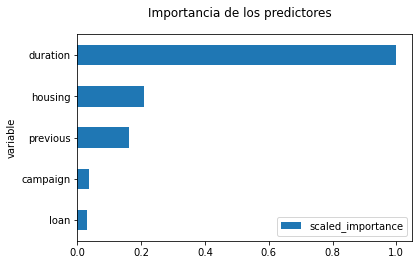

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
importancia_predictores.head(10).plot.barh(x='variable', y='scaled_importance', ax=ax)
ax.invert_yaxis()
fig.suptitle('Importancia de los predictores', fontsize='large')

In [70]:
boos_predict = boos_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [72]:
boos_predict.head(5)

predict,p0,p1
0,0.888737,0.111263
0,0.831154,0.168846
0,0.740758,0.259242
0,0.888737,0.111263
0,0.900847,0.0991526


In [73]:
boos_performance = boos_model.model_performance(test_data = test)

In [74]:
#Métricas de test
print(f"auc: {boos_performance.auc()}")
print(f"Gini: {boos_performance.gini()}")

auc: 0.861028360343184
Gini: 0.722056720686368


In [67]:
print(f"auc: {boos_model.auc(valid=True)}")
print(f"Gini: {boos_model.gini(valid=True)}")

auc: 0.861028360343184
Gini: 0.722056720686368


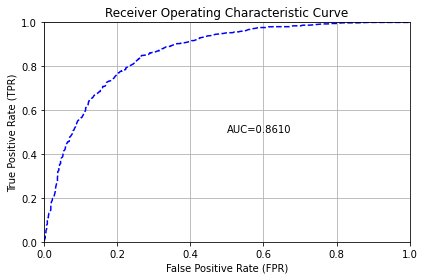

In [75]:
#Curva ROC
boos_performance.plot(type='roc')

In [76]:
#tuning
from h2o.grid.grid_search import H2OGridSearch

In [93]:
hiperparametros = {
                   "ntrees":[500, 600, 700],
                   "max_depth":[3, 5, 10, 15],
                   "min_rows":[5, 10, 15, 20]
                  }

In [94]:
boos_grid = H2OGridSearch(
                model=H2OGradientBoostingEstimator(
                        distribution = "bernoulli",
                       ),
                hyper_params    = hiperparametros
              )

In [95]:
boos_grid.train(X_h2o, y_h2o,training_frame = train)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      max_depth  min_rows  ntrees  \
0          15.0       5.0   600.0   
1          15.0       5.0   700.0   
2          15.0       5.0   500.0   
3          15.0      10.0   600.0   
4          15.0      10.0   700.0   
5          15.0      10.0   500.0   
6          10.0       5.0   600.0   
7          10.0       5.0   500.0   
8          10.0       5.0   700.0   
9          15.0      15.0   500.0   
10         15.0      15.0   600.0   
11         15.0      15.0   700.0   
12         10.0      10.0   600.0   
13         10.0      10.0   700.0   
14         10.0      10.0   500.0   
15         15.0      20.0   500.0   
16         15.0      20.0   600.0   
17         15.0      20.0   700.0   
18         10.0      15.0   500.0   
19         10.0      15.0   600.0   
20         10.0      15.0   700.0   
21         10.0      20.0   500.0   
22         10.0      20.0   600.0   
23         10.0  

In [96]:
boos_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()

,,max_depth,min_rows,ntrees,model_ids,auc
0,,15.0,5.0,600.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_20,0.980736
1,,15.0,5.0,700.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_36,0.980736
2,,15.0,5.0,500.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_4,0.980736
3,,15.0,10.0,600.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_24,0.962580
4,,15.0,10.0,700.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_40,0.962580
5,,15.0,10.0,500.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_8,0.962580
6,,10.0,5.0,600.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_19,0.957315
7,,10.0,5.0,500.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_3,0.957315
8,,10.0,5.0,700.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_35,0.957315
9,,15.0,15.0,500.0,Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_12,0.948558


In [97]:
id_boos_model_best = boos_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()['model_ids'][0]
id_boos_model_best

'Grid_GBM_py_12_sid_a816_model_python_1636298556791_6714_model_20'

In [98]:
boos_model_best = h2o.get_model(id_boos_model_best)

In [99]:
importancia_predictores = boos_model_best.varimp(use_pandas=True)
importancia_predictores

,variable,relative_importance,scaled_importance,percentage
0,duration,5751.709473,1.000000,0.694457
1,previous,837.740906,0.145651,0.101148
2,housing,792.487122,0.137783,0.095684
3,campaign,650.098755,0.113027,0.078492
4,loan,250.270264,0.043512,0.030217


Text(0.5, 0.98, 'Importancia de los predictores')

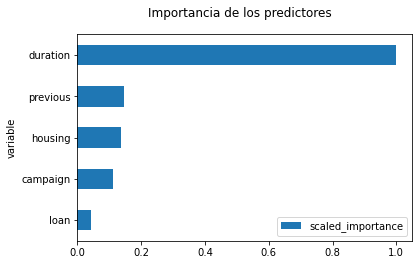

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
imporatancia_predictores.head(10).plot.barh(x='variable', y='scaled_importance', ax=ax)
ax.invert_yaxis()
fig.suptitle('Importancia de los predictores', fontsize='large')

In [101]:
boos_best_predict = boos_model_best.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [102]:
boos_best_predict.head(5)

predict,p0,p1
0,0.954716,0.0452841
0,0.954595,0.0454045
0,0.776368,0.223632
0,0.957383,0.0426172
0,0.918516,0.0814841


In [103]:
boos_best_performance = boos_model_best.model_performance(test_data = test)

In [104]:
#Métricas de test
print(f"auc: {boos_best_performance.auc()}")
print(f"Gini: {boos_best_performance.gini()}")

auc: 0.8263245501668256
Gini: 0.6526491003336512


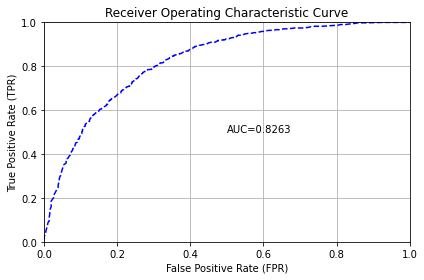

In [105]:
#Curva ROC
boos_best_performance.plot(type='roc')

In [106]:
#3.Modelo Deep Learning
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [108]:
dl_model = H2ODeepLearningEstimator(distribution = "bernoulli",
                                          hidden = [10],
                                          epochs   = 1000,
                                          nfolds = 5)
dl_model.train(X_h2o, y_h2o, training_frame = train, validation_frame = test)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1636298556791_12551


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 122 weights/biases, 5.4 KB, 8,590,050 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.545664,0.451031,0.0,0.069845,1.396035,0.837847,1.915893
2,,3,2,Softmax,,0.0,0.0,0.443559,0.454366,0.0,0.007368,2.524035,-0.073666,1.661947




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.5012896764254359
RMSE: 0.7080181328366074
LogLoss: 8.540967768153923
Mean Per-Class Error: 0.32713356300736574
AUC: 0.6992579464265966
AUCPR: 0.7058737110705777
Gini: 0.3985158928531931

Confusion Matrix (Act/Pred) for max f1 @ threshold = 8.853156697425323e-09: 


,,0,1,Error,Rate
0,0,2807.0,1433.0,0.338,(1433.0/4240.0)
1,1,1349.0,2916.0,0.3163,(1349.0/4265.0)
2,Total,4156.0,4349.0,0.3271,(2782.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,8.853157e-09,0.677037,398.0
1,max f2,6.085865e-10,0.834148,399.0
2,max f0point5,4.949017e-08,0.682846,395.0
3,max accuracy,8.853157e-09,0.672898,398.0
4,max precision,1.137370e-01,1.000000,0.0
5,max recall,6.085865e-10,1.000000,399.0
6,max specificity,1.137370e-01,1.000000,0.0
7,max absolute_mcc,4.949017e-08,0.352512,395.0
8,max min_per_class_accuracy,8.853157e-09,0.662028,398.0
9,max mean_per_class_accuracy,8.853157e-09,0.672866,398.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score:  0.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010112,3.762958e-04,1.855012,1.855012,0.930233,9.354481e-03,0.930233,0.009354,0.018757,0.018757,85.501240,85.501240,0.017342
1,2,0.020106,4.845435e-05,1.736073,1.795891,0.870588,1.397837e-04,0.900585,0.004774,0.017351,0.036108,73.607337,79.589066,0.032098
2,3,0.030100,2.646680e-05,1.782994,1.791609,0.894118,3.408753e-05,0.898438,0.003200,0.017819,0.053927,78.299428,79.160866,0.047795
3,4,0.040094,1.798096e-05,1.759534,1.783613,0.882353,2.142671e-05,0.894428,0.002408,0.017585,0.071512,75.953383,78.361347,0.063022
4,5,0.050088,1.322341e-05,1.571850,1.741360,0.788235,1.529559e-05,0.873239,0.001930,0.015709,0.087222,57.185022,74.136024,0.074486
5,6,0.100059,4.847649e-06,1.618771,1.680138,0.811765,8.313721e-06,0.842538,0.000971,0.080891,0.168113,61.877112,68.013770,0.136509
6,7,0.150029,1.995320e-06,1.365398,1.575307,0.684706,3.086894e-06,0.789969,0.000648,0.068230,0.236342,36.539825,57.530677,0.173135
7,8,0.200000,4.379998e-07,1.177715,1.475967,0.590588,1.074716e-06,0.740153,0.000487,0.058851,0.295193,17.771464,47.596717,0.190948
8,9,0.300059,7.638792e-08,1.394257,1.448720,0.699177,1.773995e-07,0.726489,0.000324,0.139508,0.434701,39.425653,44.871962,0.270078
9,10,0.400000,2.807752e-08,1.365398,1.427902,0.684706,4.930236e-08,0.716049,0.000243,0.136460,0.571161,36.539825,42.790152,0.343330




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.49379848202376736
RMSE: 0.7027079635408776
LogLoss: 8.536338855516885
Mean Per-Class Error: 0.34593213775023834
AUC: 0.6839963842051954
AUCPR: 0.6700900168289264
Gini: 0.36799276841039075

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.6922389138212186e-09: 


,,0,1,Error,Rate
0,0,575.0,474.0,0.4519,(474.0/1049.0)
1,1,270.0,754.0,0.2637,(270.0/1024.0)
2,Total,845.0,1228.0,0.3589,(744.0/2073.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.692239e-09,0.669627,397.0
1,max f2,1.096662e-10,0.829956,399.0
2,max f0point5,2.901090e-08,0.653541,385.0
3,max accuracy,1.126524e-08,0.654607,391.0
4,max precision,4.146456e-02,1.000000,0.0
5,max recall,1.096662e-10,1.000000,399.0
6,max specificity,4.146456e-02,1.000000,0.0
7,max absolute_mcc,2.901090e-08,0.310837,385.0
8,max min_per_class_accuracy,6.836332e-09,0.643555,393.0
9,max mean_per_class_accuracy,1.126524e-08,0.654068,391.0



Gains/Lift Table: Avg response rate: 49.40 %, avg score:  0.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010130,3.340027e-04,1.831613,1.831613,0.904762,8.472998e-03,0.904762,0.008473,0.018555,0.018555,83.161272,83.161272,0.016648
1,2,0.020260,3.653483e-05,1.446010,1.638811,0.714286,1.143949e-04,0.809524,0.004294,0.014648,0.033203,44.601004,63.881138,0.025577
2,3,0.030391,2.860401e-05,1.446010,1.574544,0.714286,3.208124e-05,0.777778,0.002873,0.014648,0.047852,44.601004,57.454427,0.034506
3,4,0.040039,1.666642e-05,1.315869,1.512213,0.650000,2.066835e-05,0.746988,0.002186,0.012695,0.060547,31.586914,51.221291,0.040528
4,5,0.050169,1.289380e-05,1.542411,1.518311,0.761905,1.440091e-05,0.750000,0.001747,0.015625,0.076172,54.241071,51.831055,0.051386
5,6,0.100338,4.708206e-06,1.635104,1.576707,0.807692,8.391659e-06,0.778846,0.000878,0.082031,0.158203,63.510367,57.670711,0.114352
6,7,0.150024,1.845874e-06,1.316852,1.490646,0.650485,2.953617e-06,0.736334,0.000588,0.065430,0.223633,31.685187,49.064572,0.145463
7,8,0.200193,3.620366e-07,1.265259,1.434163,0.625000,9.575507e-07,0.708434,0.000441,0.063477,0.287109,26.525879,43.416322,0.171761
8,9,0.300048,8.136992e-08,1.388728,1.419043,0.685990,1.674545e-07,0.700965,0.000294,0.138672,0.425781,38.872849,41.904265,0.248470
9,10,0.399904,2.450457e-08,1.271371,1.382169,0.628019,4.973888e-08,0.682750,0.000221,0.126953,0.552734,27.137115,38.216931,0.302019




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.36782308419427817
RMSE: 0.6064841994597041
LogLoss: 2.615821342284173
Mean Per-Class Error: 0.3793242219469575
AUC: 0.6173763520537946
AUCPR: 0.6451729687967885
Gini: 0.2347527041075892

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.2871466889592433e-05: 


,,0,1,Error,Rate
0,0,0.0,4240.0,1.0,(4240.0/4240.0)
1,1,0.0,4265.0,0.0,(0.0/4265.0)
2,Total,0.0,8505.0,0.4985,(4240.0/8505.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.000023,0.667972,399.0
1,max f2,0.000023,0.834148,399.0
2,max f0point5,0.069110,0.621105,345.0
3,max accuracy,0.069110,0.620459,345.0
4,max precision,0.999948,0.869231,0.0
5,max recall,0.000023,1.000000,399.0
6,max specificity,0.999948,0.987972,0.0
7,max absolute_mcc,0.069110,0.244005,345.0
8,max min_per_class_accuracy,0.016670,0.608910,379.0
9,max mean_per_class_accuracy,0.069110,0.620676,345.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score: 30.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010112,9.999992e-01,1.669511,1.669511,0.837209,9.999998e-01,0.837209,1.000000,0.016882,0.016882,66.951116,66.951116,0.013580
1,2,0.020106,9.999886e-01,1.736073,1.702598,0.870588,9.999950e-01,0.853801,0.999997,0.017351,0.034232,73.607337,70.259764,0.028336
2,3,0.030100,9.999519e-01,1.689152,1.698133,0.847059,9.999731e-01,0.851562,0.999989,0.016882,0.051114,68.915247,69.813343,0.042151
3,4,0.040094,9.998559e-01,1.876836,1.742678,0.941176,9.999073e-01,0.873900,0.999969,0.018757,0.069871,87.683608,74.267808,0.059730
4,5,0.050088,9.996640e-01,1.524929,1.699231,0.764706,9.997720e-01,0.852113,0.999930,0.015240,0.085111,52.492932,69.923055,0.070253
5,6,0.100059,9.951066e-01,1.614079,1.656705,0.809412,9.982050e-01,0.830787,0.999068,0.080657,0.165768,61.407903,65.670482,0.131806
6,7,0.150029,9.649639e-01,1.262172,1.525297,0.632941,9.833103e-01,0.764890,0.993820,0.063072,0.228839,26.217226,52.529703,0.158085
7,8,0.200000,8.805973e-01,0.853960,1.357562,0.428235,9.268626e-01,0.680776,0.977090,0.042673,0.271512,-14.603958,35.756155,0.143446
8,9,0.300059,4.962490e-01,1.089629,1.268216,0.546416,7.142009e-01,0.635972,0.889426,0.109027,0.380539,8.962906,26.821572,0.161435
9,10,0.400000,1.147268e-01,1.327862,1.283118,0.665882,2.801610e-01,0.643445,0.737199,0.132708,0.513247,32.786153,28.311841,0.227162




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.740150,0.050837,0.683470,0.760555,0.795956,0.689132,0.771636
1,auc,0.819060,0.041665,0.773351,0.838152,0.857733,0.774811,0.851253
2,err,0.259850,0.050837,0.316530,0.239445,0.204044,0.310868,0.228364
3,err_count,441.600000,84.049390,540.000000,414.000000,333.000000,512.000000,409.000000
4,f0point5,0.724791,0.048759,0.668081,0.741379,0.786785,0.682742,0.744969
5,f1,0.772761,0.028388,0.736842,0.779318,0.806283,0.751215,0.790149
6,f2,0.829124,0.008730,0.821382,0.821348,0.826772,0.834954,0.841162
7,lift_top_group,1.676313,0.347536,2.007059,1.455387,1.631068,1.243531,2.044521
8,logloss,2.646113,2.104425,4.793579,0.910988,1.610265,5.058437,0.857296
9,max_per_class_error,0.394691,0.129244,0.521028,0.329506,0.250000,0.541772,0.331148



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-07 12:37:21,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-11-07 12:37:21,40.526 sec,603191 obs/sec,10.0,1,85050.0,0.706059,7.625406,-0.994094,...,0.725612,1.970951,0.303821,0.711348,7.745282,-1.024360,0.760460,0.723935,1.735212,0.307284
2,,2021-11-07 12:37:26,45.579 sec,840284 obs/sec,510.0,51,4337550.0,0.678193,2.640606,-0.839796,...,0.778643,1.808637,0.295003,0.674267,2.689477,-0.818810,0.759981,0.750028,1.928013,0.326580
3,,2021-11-07 12:37:30,49.793 sec,920099 obs/sec,1010.0,101,8590050.0,0.708018,8.540968,-1.005176,...,0.705874,1.855012,0.327102,0.702708,8.536339,-0.975481,0.683996,0.670090,1.831613,0.358900



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,housing.0,1.000000,1.000000,0.312447
1,housing.1,0.554391,0.554391,0.173218
2,loan.0,0.479578,0.479578,0.149843
3,previous,0.456660,0.456660,0.142682
4,loan.1,0.439763,0.439763,0.137403
5,duration,0.202946,0.202946,0.063410
6,campaign,0.067206,0.067206,0.020998
7,housing.missing(NA),0.000000,0.000000,0.000000
8,loan.missing(NA),0.000000,0.000000,0.000000


In [109]:
#tuning
from h2o.grid.grid_search import H2OGridSearch

In [112]:
hiperparametros = {
                   "hidden":[5, 10, 15],
                   "epochs":[500, 1000, 1500, 2000]
                  }

In [113]:
dl_grid = H2OGridSearch(
                        model=H2ODeepLearningEstimator(
                        distribution = "bernoulli",
                       ),
                hyper_params    = hiperparametros
              )

In [114]:
dl_grid.train(X_h2o, y_h2o,training_frame = train)

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%
      epochs  hidden  \
0      500.0    15.0   
1     2000.0    15.0   
2     2000.0    10.0   
3     2000.0     5.0   
4     1000.0    15.0   
5     1500.0    15.0   
6      500.0    10.0   
7     1000.0     5.0   
8     1000.0    10.0   
9     1500.0    10.0   
10     500.0     5.0   
11    1500.0     5.0   

                                                                model_ids  \
0   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
1   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
2   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
3   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
4   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
5   Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...   
6   Grid_DeepLearning_py_12_sid_a816_model_python_163

In [115]:
dl_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()

,,epochs,hidden,model_ids,auc
0,,2000.0,10.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.865795
1,,1000.0,15.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.859219
2,,1500.0,10.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.846527
3,,1000.0,10.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.844747
4,,1000.0,5.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.840157
5,,500.0,10.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.817814
6,,2000.0,15.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.805732
7,,500.0,15.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.778818
8,,2000.0,5.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.769080
9,,500.0,5.0,Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_...,0.767087


In [116]:
id_dl_model_best = dl_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()['model_ids'][0]
id_dl_model_best

'Grid_DeepLearning_py_12_sid_a816_model_python_1636298556791_12608_model_8'

In [117]:
dl_model_best = h2o.get_model(id_dl_model_best)

In [119]:
dl_best_predict = dl_model_best.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [120]:
dl_best_predict.head(5)

predict,p0,p1
0,0.999087,0.000913304
0,0.993644,0.00635583
0,0.978207,0.0217931
0,0.999224,0.000775678
0,0.994488,0.00551176


In [121]:
dl_best_performance = dl_model_best.model_performance(test_data = test)

In [122]:
#Métricas de test
print(f"auc: {dl_best_performance.auc()}")
print(f"Gini: {dl_best_performance.gini()}")

auc: 0.846834224559104
Gini: 0.6936684491182079


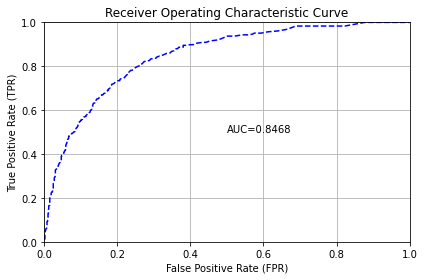

In [123]:
#Curva ROC
dl_best_performance.plot(type='roc')

In [ ]:
#Tarea
#1.Comparar lo modelos con naive bayes, random forest, stacking.
#2.Presentar los resultados del modelo de automl. => casa
#3.Colocar en una base de datos final: variables,target_pred,prob_0,prob_1.